In [478]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [479]:
accidents = pd.read_csv("data/processed/Road Safety Data - Accidents 2019.csv") 
vehicle   = pd.read_csv("data/processed/Road Safety Data - Vehicles 2019.csv")
casualty  = pd.read_csv("data/processed/Road Safety Data - Vehicles 2019.csv")

result = pd.concat([accidents, vehicle, casualty], axis=1)

# Locating our city (Sheffield)
Sheffield has the coordinates (lat, long) = (53.381130, -1.470085) thus we bounded the city limits from the followingcoordinates

Or we just used the LAD

In [482]:
sheffield = (result["Local_Authority_(District)"] == 215)
data = result[sheffield]
data = data.loc[:,~data.columns.duplicated()]

In [480]:
#list(data.columns)

In [489]:
date = data["Date"]
print(min(date),max(date))

01/01/2019 31/12/2019


# Number of Casualties in 2019



In [484]:
sum(data['Number_of_Casualties'])

1191.0

# Sum of casualties each day in sheffield

In [485]:
Sunday    =  (data['Day_of_Week']==1)
Monday    =  (data['Day_of_Week']==2) 
Tuesday   =  (data['Day_of_Week']==3)
Wednesday =  (data['Day_of_Week']==4)
Thursday  =  (data['Day_of_Week']==5)
Friday    =  (data['Day_of_Week']==6)
Saturday  =  (data['Day_of_Week']==7)

week_masks = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
entire = [sum(data['Number_of_Casualties'][i]) for i in week_masks]

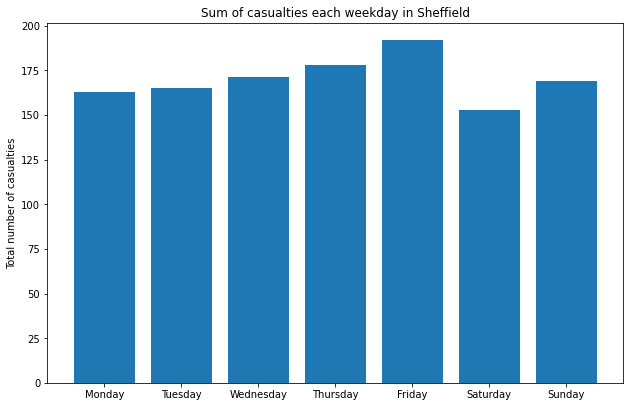

In [486]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Sum of casualties each weekday in Sheffield")
axes.set_ylabel("Total number of casualties")
axes.bar(week, entire, tick_label = week)
plt.plot();

# Most deadly accident in Sheffield
The most deadly accident in Sheffield has a total of 13 deaths 

In [487]:
mx = max(data['Number_of_Casualties'])
mask = (data['Number_of_Casualties'] == mx)
data[mask]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
45460,2019140838359,441195.0,389563.0,-1.38188,53.401308,14.0,3.0,2.0,13.0,10/05/2019,...,6,1,76,11,1242,1,4,8,3,8


# Task 1
Report the frequency of road collisions in your city for 1) different age groups, 2) in different times
(during the day, the week, or year), 3) and for differences in one other condition.

In [488]:
data["Accident_Index"].size

909

There was a total of 909 accidents in the Sheffield district in 2019

## Frequency of road collisions in your city for different age groups

In [491]:
mask_age = (data["Age_of_Driver"] >= 0)
AoD = data["Age_of_Driver"][mask_age]

In [496]:
l = []
mask = (data["Age_of_Driver"] <20)

l.append(AoD[mask].shape[0])
mask = (data["Age_of_Driver"] >20) & (data["Age_of_Driver"] <40)
l.append(AoD[mask].shape[0])
mask = (data["Age_of_Driver"] >40) & (data["Age_of_Driver"] <60)
l.append(AoD[mask].shape[0])
mask = (data["Age_of_Driver"] >60) & (data["Age_of_Driver"] <80)
l.append(AoD[mask].shape[0])
mask = (data["Age_of_Driver"] >80)
l.append(AoD[mask].shape[0])
print(l)

[51, 322, 239, 99, 21]


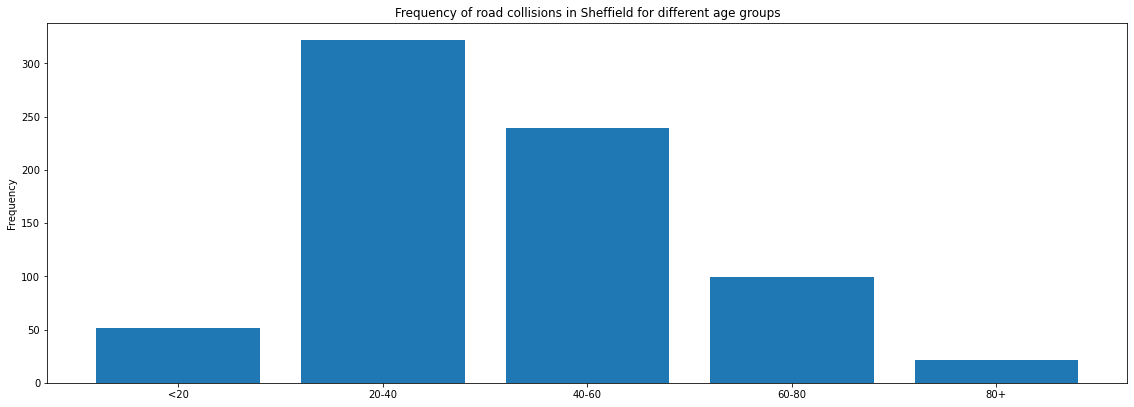

In [497]:
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield for different age groups")
axes.set_ylabel("Frequency")
interval = ["<20",'20-40', '40-60', '60-80', '80+']
axes.bar(interval, l);

## Report the frequency of road collisions in your city for in different times (during the day, the week, or year)

### Day
There is no bad data (negative timestamps and so on), in the time column, thus no cleaning is needed.

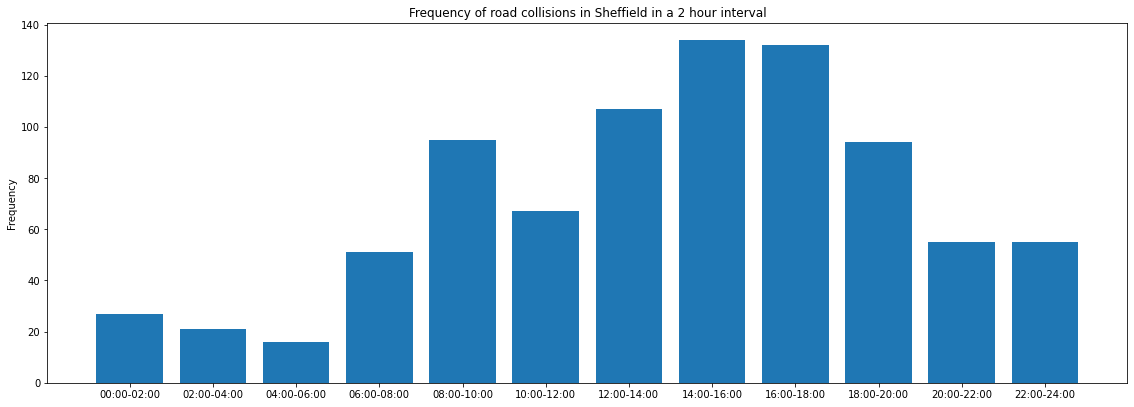

In [474]:
l = [['00:00', '02:00'], 
     ['02:00', '04:00'], 
     ['04:00', '06:00'], 
     ['06:00', '08:00'], 
     ['08:00', '10:00'], 
     ['10:00', '12:00'],
     ['12:00', '14:00'], 
     ['14:00', '16:00'], 
     ['16:00', '18:00'], 
     ['18:00', '20:00'], 
     ['20:00', '22:00'],
     ['22:00', '24:00']]

empty = []
for i in range(0,12):
    mask = (data["Time"] < l[i][1]) & (data["Time"] > l[i][0])
    total = len(data[mask]["Time"])
    empty.append(total)
    
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield in a 2 hour interval")
axes.set_ylabel("Frequency")
interval = ["00:00-02:00",'02:00-04:00', '04:00-06:00', '06:00-08:00', '08:00-10:00', '10:00-12:00',
                 '12:00-14:00','14:00-16:00', '16:00-18:00', '18:00-20:00', '20:00-22:00', '22:00-24:00']
axes.bar(interval, empty);

### Week

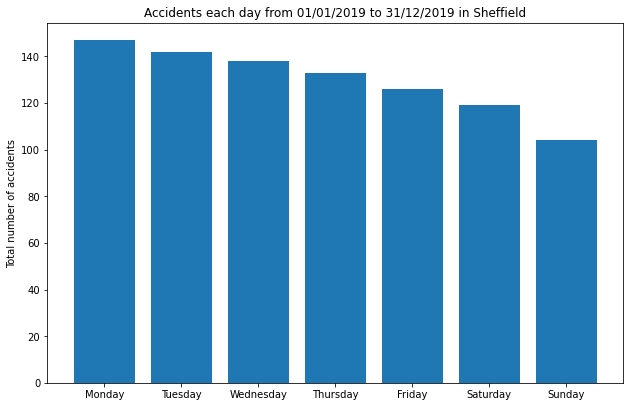

In [475]:
week = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"]
unq = data["Day_of_Week"].unique()
count = data["Day_of_Week"].value_counts()
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Accidents each day from 01/01/2019 to 31/12/2019 in Sheffield")
axes.set_ylabel("Total number of accidents")
axes.bar(sorted(unq), count, tick_label = week)
plt.plot();

### year